# Group No 97

## Group Member Names:
|No.|Member|Student ID|
|--|--|--|
|1|Shreysi Kalra|2021fc04586|
|2|Vinayak Nayak|2021fc04135|
|3|Ajith Praveen R|2021fc04329|

# 1. Problem Statement
 
Students are expected to identify a classification / regression problem of your choice. You have to detail the problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What kind of prediction (classification / regression) task are you performing?

ENSURE THAT YOU ARE USING NUMERICAL / CATEGORICAL DATA only.

DO NOT use images or textual data.

Score: 1 Mark in total (0.5 mark each)

In [ ]:
!head -n 10 ./StudentsPerformance.csv

"gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"
"female","group B","bachelor's degree","standard","none","72","72","74"
"female","group C","some college","standard","completed","69","90","88"
"female","group B","master's degree","standard","none","90","95","93"
"male","group A","associate's degree","free/reduced","none","47","57","44"
"male","group C","some college","standard","none","76","78","75"
"female","group B","associate's degree","standard","none","71","83","78"
"female","group B","some college","standard","completed","88","95","92"
"male","group B","some college","free/reduced","none","40","43","39"
"male","group D","high school","free/reduced","completed","64","64","67"


### Student Performance Prediction

<img src="https://images.pexels.com/photos/249360/pexels-photo-249360.jpeg?auto=compress&cs=tinysrgb&w=500" style="margin-left:auto;margin-right:auto">

<div class="alert alert-primary"  style="padding: 10px; background-color: #a5eaf2; color: gray;">
  In this problem, we are trying to predict the scores of students in three tests given information regarding their demographic information, academic attributes and their preparedness for the tests.<br>
    The intention here is to figure out the performance beforehand and use that as a pre-emptive measure to bolster the student's aptitude in places where he needs help.<br>
    Since the scores are continuous in nature, we are going to model this as a regression problem. As we have three test scores to predict, we will have 3 outputs and we have 5 attributes/features.
</div>

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly

Since we're downloading data from kaggle, we will use the kaggle API to fetch the data. For that we will need to install the kaggle library and set our credentials in order to use it. Follow [these steps](https://www.kaggle.com/docs/api#getting-started-installation-&-authentication) in order to authenticate and create a new API Token to use the kaggle python library for downloading the dataset.

In [ ]:
!pip install -q kaggle

In [ ]:
# Take a look at your credentials file 
!cat ~/.kaggle/kaggle.json

In [ ]:
# Protect your authentication file against accidental overwriting by only allowing read access to the file
!chmod +400 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset from kaggle
!kaggle datasets download -d spscientist/students-performance-in-exams

In [ ]:
# Unip the downloaded dataset and delete the zip
!unzip -q students-performance-in-exams.zip
!rm students-performance-in-exams.zip

## 2.2 Code for converting the above downloaded data into a form suitable for DL 

<div class="alert alert-primary"  style="padding: 10px; background-color: #a5eaf2; color: gray;">
The data is in the form of a csv file and can be conveniently used for building our deep learning regression model
</div>




## 2.3 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?

Score: 2 Mark

In [ ]:
# Get the size of the dataset
!ls -alth StudentsPerformance.csv

-rw-rw-r-- 1 vinayak vinayak 71K Oct 11  2019 StudentsPerformance.csv


In [ ]:
# Number of records in the dataset
!cat StudentsPerformance.csv| wc -l

1001


In [ ]:
# Peek at the header and first row of the dataset
!head -n 2 StudentsPerformance.csv

"gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"
"female","group B","bachelor's degree","standard","none","72","72","74"


<div class="alert alert-primary"  style="padding: 10px; background-color: #a5eaf2; color: gray;">
    <b>Size of dataset</b>
<ul>
    <li>Disk Space occupied: 71KB</li>
    <li>Total Number of records: 1000</li>
</ul>
    <b>Attribute information is as follows</b>
</div>

|Attribute Name|Description|Attribute Type|
|--|--|--|
|Gender|Gender of the subject|Nominal|
|Race/Ethnicity|Race to which the subject belongs(masked)|Nominal|
|Parental Level of Education|Extent of education|Ordinal|
|Lunch|Kind of lunch opted for|Nominal|
|Test Prep Course|Whether or not preparation for the test is done|Ordinal|
|Math Score|Marks obtained in math|Numeric|
|Reading Score|Marks obtained in reading|Numeric|
|Writing Score|Marks obtained in writing|Numeric|

# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


## 3.1 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


IF ANY

In [ ]:
!pip install -q seaborn pandas numpy matplotlib 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
%matplotlib inline

# Read the data into a dataframe
df = pd.read_csv("StudentsPerformance.csv")
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [ ]:
# Peek at all the column names
print(f"Dataset columns\n{df.columns.tolist()}")

Dataset columns
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


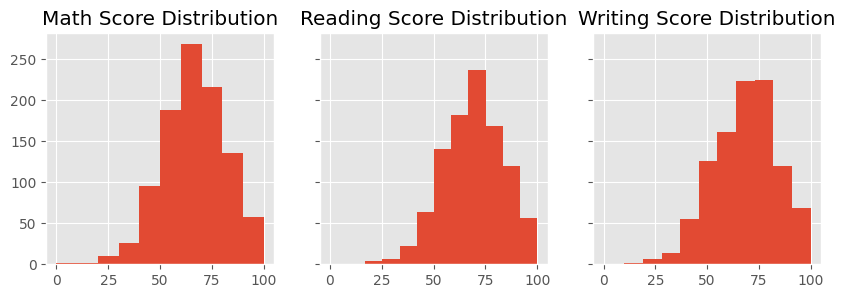

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (10,3), sharex = True, sharey = True)
ax[0].hist(df["math score"]); ax[0].set_title(f"Math Score Distribution")
ax[1].hist(df["reading score"]); ax[1].set_title(f"Reading Score Distribution")
ax[2].hist(df["writing score"]); ax[2].set_title(f"Writing Score Distribution");

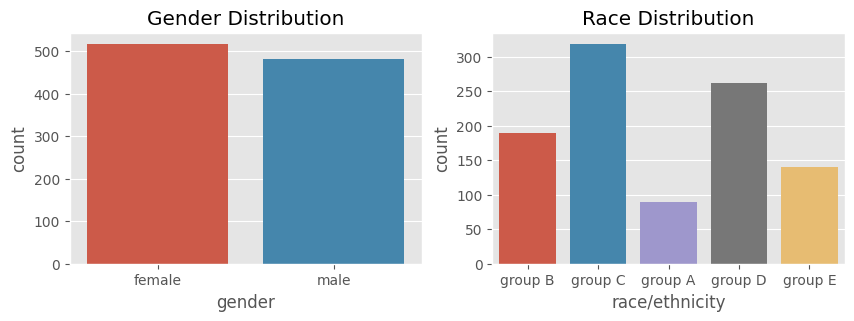

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,3))
sns.countplot(x = df["gender"], ax = ax[0]); ax[0].set_title("Gender Distribution")
sns.countplot(x = df["race/ethnicity"], ax = ax[1]); ax[1].set_title("Race Distribution");

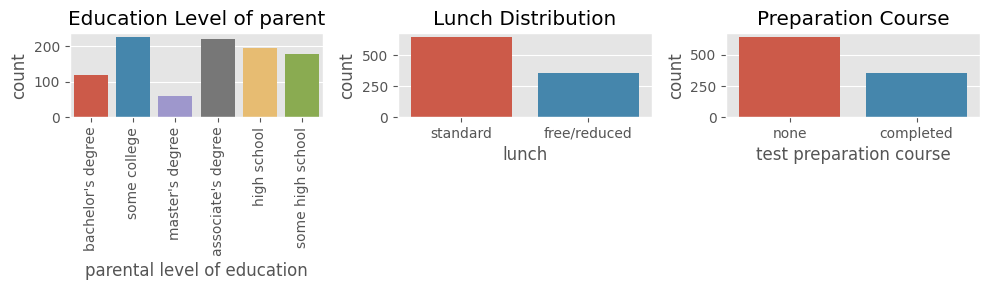

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (10,3))

sns.countplot(x = df["parental level of education"], ax = ax[0]); ax[0].set_title("Education Level of parent"); ax[0].tick_params(axis='x', rotation=90)
sns.countplot(x = df["lunch"], ax = ax[1]); ax[1].set_title("Lunch Distribution")
sns.countplot(x = df["test preparation course"], ax = ax[2]); ax[2].set_title("Preparation Course")
fig.tight_layout();

- `Gender`, `Lunch Distribution` and `Preparation Course` are binary variables with a very slight imbalance in their levels (in the latter 2)
- `Parent's education` is a six level ordinal variable with a relatively small number of parents having bachelor's or master's degree
- `Race` is also an imbalanced distribution with five levels (Masked).

It seems like the scores are near normal distributed with a slight left skew.

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

None of the columns in the dataset are missing. So, we don't need to impute anything or substitute for any record across any feature in the dataset.

In [ ]:
df.duplicated().sum()

0

None of the records seem to be duplicated. All rows are unique instances. Hence keep the records as is.

## 3.2 Encode categorical data

In [ ]:
!pip install -q scikit-learn

- The binary attributes are all nominal in nature and can be simply encoded in a `1/0` fashion.

- `Race` is a nominal attribute which could be one-hot-encoded

- `Parent's education` is an ordinal attribute and can be label encoded.

In [ ]:
for col, level in [("gender", "male"), ("lunch", "standard"), ("test preparation course", "none")]:
    df[col] = df[col].apply(lambda x: 0. if x == level else 1.)
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,group B,bachelor's degree,0.0,0.0,72,72,74
1,1.0,group C,some college,0.0,1.0,69,90,88


In [ ]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
education_order = {"high school": 0, "some high school": 0, "some college": 1, 
                   "associate's degree": 2, "bachelor's degree": 3, "master's degree": 4}
df["parental level of education"] = df["parental level of education"].apply(lambda x: education_order[x])
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,group B,3,0.0,0.0,72,72,74
1,1.0,group C,1,0.0,1.0,69,90,88


Now let's one hot encode the categorical column for race. We shall drop the first race to avoid redundancy

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = "first")
df_encoded = pd.DataFrame(ohe.fit_transform(df[["race/ethnicity"]]).toarray(), columns = ohe.get_feature_names_out())

In [ ]:
df_processed = pd.concat([df, df_encoded], axis = 1)

In [ ]:
df_processed

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1.0,group B,3,0.0,0.0,72,72,74,1.0,0.0,0.0,0.0
1,1.0,group C,1,0.0,1.0,69,90,88,0.0,1.0,0.0,0.0
2,1.0,group B,4,0.0,0.0,90,95,93,1.0,0.0,0.0,0.0
3,0.0,group A,2,1.0,0.0,47,57,44,0.0,0.0,0.0,0.0
4,0.0,group C,1,0.0,0.0,76,78,75,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,group E,4,0.0,1.0,88,99,95,0.0,0.0,0.0,1.0
996,0.0,group C,0,1.0,0.0,62,55,55,0.0,1.0,0.0,0.0
997,1.0,group C,0,1.0,1.0,59,71,65,0.0,1.0,0.0,0.0
998,1.0,group D,1,0.0,1.0,68,78,77,0.0,0.0,1.0,0.0


In [ ]:
df_processed.drop(["race/ethnicity"], inplace = True, axis = 1)

## 3.3 Normalize the data

Out targets are numerical. We shall normalize them to lie in the range of 0-1.

Since we've seen that the range of marks is from 0 to 100, we shall simply divide by 100 to bring the data in 0-1 range.

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
for col in ["math score", "reading score", "writing score"]:
    df_processed[col] = df_processed[col] / 100
df_processed.head(2)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1.0,3,0.0,0.0,0.72,0.72,0.74,1.0,0.0,0.0,0.0
1,1.0,1,0.0,1.0,0.69,0.90,0.88,0.0,1.0,0.0,0.0


We could also normalize the parental level of education to lie between 0-1 so it would be easier for the network when learning

In [ ]:
df_processed["parental level of education"] = df_processed["parental level of education"] / 4

## 3.4 Feature Engineering 

if any

In [ ]:
# In this problem, there doesn't seem to be much scope for feature engineering
df_processed.head(2)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1.0,0.75,0.0,0.0,0.72,0.72,0.74,1.0,0.0,0.0,0.0
1,1.0,0.25,0.0,1.0,0.69,0.90,0.88,0.0,1.0,0.0,0.0


## 3.5 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.



In [ ]:
target_variables = ["math score", "reading score", "writing score"]
attribute_variables = [x for x in df_processed.columns.tolist() if x not in target_variables]

X = df_processed[attribute_variables].values
y = df_processed[target_variables].values

In [ ]:
# Have a look at the X and y variables
X, y

(array([[1.  , 0.75, 0.  , ..., 0.  , 0.  , 0.  ],
        [1.  , 0.25, 0.  , ..., 1.  , 0.  , 0.  ],
        [1.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [1.  , 0.  , 1.  , ..., 1.  , 0.  , 0.  ],
        [1.  , 0.25, 0.  , ..., 0.  , 1.  , 0.  ],
        [1.  , 0.25, 1.  , ..., 0.  , 1.  , 0.  ]]),
 array([[0.72, 0.72, 0.74],
        [0.69, 0.9 , 0.88],
        [0.9 , 0.95, 0.93],
        ...,
        [0.59, 0.71, 0.65],
        [0.68, 0.78, 0.77],
        [0.77, 0.86, 0.86]]))

In [ ]:
# Inspect the shape of both these arrays
X.shape, y.shape

((1000, 8), (1000, 3))

## 3.6 Split the data into training set and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [ ]:
X_train.shape, y_train.shape

((800, 8), (800, 3))

In [ ]:
X_test.shape, y_test.shape

((200, 8), (200, 3))

In [ ]:
# Make sure that the train and test set sizes are 80% and 20% of the entire data respectively
assert X_train.shape[0] == len(X) * 0.8
assert X_test.shape[0] == len(X) * 0.2

## 3.7 Report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset

Score: 3 Marks

<div class="alert alert-primary"  style="padding: 10px; background-color: #a5eaf2; color: gray;">
    <b>Data Deduplication</b><br>
    <span>None, the data had no duplicates</span><br>
    <b>Missing Data Imputation</b><br>
    <span>None of the instances had a single attibute missing.</span><br>
    <b>Data Inconsistency</b><br>
    <span>Provided data seemed consistent.</span><br>
    <b>Categorical Data Encoding</b><br>
    <ul>
        <li>The binary attributes are all nominal in nature and can be simply encoded in a `1/0` fashion.</li>
        <li>`Race` is a nominal attribute which is one-hot-encoded</li>
        <li>`Parent's education` is an ordinal attribute and is label encoded.</li>
    </ul>
    <b>Normalization Technique Used</b><br>
    <span>Division by a hundred. Since we knew the range of data to begin with.</span><br>
    <b>Dataset Sizes</b><br>
    <span>Train: 800  | Test: 200</span>
</div>

# 4. Deep Neural Network Architecture



## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1

2022-12-03 21:46:21.969016: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 21:46:22.265398: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib64
2022-12-03 21:46:22.265419: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-03 21:46:22.875893: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared

In [ ]:
X_train.shape

(800, 8)

In [ ]:
model = tf.keras.Sequential([ layers.Input(X_train.shape[-1],),
                              layers.Dense(64, activation='relu', kernel_regularizer = l1(1e-4)),
                              layers.BatchNormalization(), layers.Dropout(.1),
                              layers.Dense(32, activation = 'relu'),
                              layers.Dense(3, activation = 'linear')])

2022-12-03 21:46:23.706042: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 21:46:23.707153: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib64
2022-12-03 21:46:23.707373: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib64
2022-12-03 21:46:23.707582: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot ope

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3,011
Trainable params: 2,883
Non-trainable params: 128
____________________________________________________

## 4.2 Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Activation function used in each hidden layer
* Activation function used in the output layer
* Total number of trainable parameters 

Score: 4 Marks

We have defined a two layer model as follows

![](https://i.imgur.com/KozywLd.png)

<div class="alert alert-primary"  style="padding: 10px; background-color: #a5eaf2; color: gray;">
    <b>Number of layers</b><br>
    <span>Our architecture is as defined above: 1 input, 2 hidden and 1 output layer</span><br>
    <b>Number of units in each layer</b>
    <ul>
        <li>Input layer - 8 neurons</li>
        <li>First Hidden Layer - 64 neurons</li>
        <li>Batch Normalization Layer - 64 neurons</li>
        <li>Dropout with p = 10%</li>
        <li>Second Hidden Layer - 64 neurons</li>
        <li>Output Layer - 3 neurons</li>
    </ul>
    <b>Activation function in hidden layers</b><br>
    <span>In both hidden layers, ReLU is used as activation. It is easy to implement, differentiable, does not saturate unlike sigmoid and as we don't have any constraint to model the output as a probability distribution or anything in the hidden layer output, this activation function makes sense.</span><br>
    <b>Activation function in output layer</b><br>
    <span>Linear Activation function is used in the output layer. The output although constrained with 0-1 in this case (in training data) has a continuous representation and no notion of probability to it. Hence this activation function</span><br>
    <b>Total number of trainable parameters</b> 
</div>

![](https://i.imgur.com/663ydoU.png)

# 5. Training the model


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations



In [ ]:
from sklearn.metrics import mean_squared_error
from functools import partial

def RMSE(y_true, y_pred):
    return tf.py_function(partial(mean_squared_error, squared=False), (y_true, y_pred), tf.double)

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam

def train_model(optim, lr, bs, eps):
    
    # Define the model architecture
    model = tf.keras.Sequential([ layers.Input(X_train.shape[-1],),
                              layers.Dense(64, activation='relu', kernel_regularizer = l1(1e-4)),
                              layers.BatchNormalization(), layers.Dropout(.1),
                              layers.Dense(32, activation = 'relu'),
                              layers.Dense(3, activation = 'linear')])
    
    # Define optimizer, learning rate and metric
    if optim == "SGD":
        model.compile(optimizer=SGD(learning_rate = lr), 
                      loss=tf.keras.losses.MeanSquaredError(), 
                      metrics=[RMSE])
    else:
        model.compile(optimizer=Adam(learning_rate = lr), 
                      loss=tf.keras.losses.MeanSquaredError(), 
                      metrics=[RMSE])
    
    # Train the model
    history = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = eps, batch_size = bs)
    return model, history

## 5.2 Train the model

In [ ]:
from itertools import product 
optims = ["SGD", "Adam"]; learning_rates = [5e-2, 1e-3]; epochs = [20,40]; batch_sizes = [8, 32, 64]
hyperparam_combinations = list(product(optims, learning_rates, epochs, batch_sizes))
print(f"Total hyperparam combinations:\n{hyperparam_combinations}")

Total hyperparam combinations:
[('SGD', 0.05, 20, 8), ('SGD', 0.05, 20, 32), ('SGD', 0.05, 20, 64), ('SGD', 0.05, 40, 8), ('SGD', 0.05, 40, 32), ('SGD', 0.05, 40, 64), ('SGD', 0.001, 20, 8), ('SGD', 0.001, 20, 32), ('SGD', 0.001, 20, 64), ('SGD', 0.001, 40, 8), ('SGD', 0.001, 40, 32), ('SGD', 0.001, 40, 64), ('Adam', 0.05, 20, 8), ('Adam', 0.05, 20, 32), ('Adam', 0.05, 20, 64), ('Adam', 0.05, 40, 8), ('Adam', 0.05, 40, 32), ('Adam', 0.05, 40, 64), ('Adam', 0.001, 20, 8), ('Adam', 0.001, 20, 32), ('Adam', 0.001, 20, 64), ('Adam', 0.001, 40, 8), ('Adam', 0.001, 40, 32), ('Adam', 0.001, 40, 64)]


In [ ]:
models = []
for optim, lr, eps, bs in hyperparam_combinations:
    print(f"\n============================ Beginning trial with hyperparams: OPTIMIZER: {optim}, LEARNING RATE: {lr}, BATCH SIZE: {bs} EPOCHS: {eps}============================\n")
    model = train_model(optim, lr, bs, eps)
    models.append(model)


============================ Beginning trial with hyperparams: OPTIMIZER: SGD, LEARNING RATE: 0.05, EPOCHS: 20============================

Epoch 1/20
100/100 [==============================] - 1s 6ms/step - loss: 0.1838 - RMSE: 0.3852 - val_loss: 0.1538 - val_RMSE: 0.3776
Epoch 2/20
100/100 [==============================] - 1s 7ms/step - loss: 0.0685 - RMSE: 0.2388 - val_loss: 0.1038 - val_RMSE: 0.3051
Epoch 3/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0525 - RMSE: 0.2062 - val_loss: 0.0598 - val_RMSE: 0.2241
Epoch 4/20
100/100 [==============================] - 1s 6ms/step - loss: 0.0441 - RMSE: 0.1870 - val_loss: 0.0378 - val_RMSE: 0.1700
Epoch 5/20
100/100 [==============================] - 1s 6ms/step - loss: 0.0389 - RMSE: 0.1731 - val_loss: 0.0312 - val_RMSE: 0.1504
Epoch 6/20
100/100 [==============================] - 1s 6ms/step - loss: 0.0367 - RMSE: 0.1672 - val_loss: 0.0297 - val_RMSE: 0.1457
Epoch 7/20
100/100 [==============================] - 1

In [ ]:
final_metrics = []
best_hyperparam = None; lowest_loss = 10000; idx = -1
for mdl, history in models:
    final_metrics.append(history.history["val_RMSE"][-1])

for i, (hparam, metric) in enumerate(zip(hyperparam_combinations, final_metrics)):
    print(f"Optimizer: {hparam[0]:>5}| LR: {hparam[1]:.4f}| Epochs: {hparam[2]}| Batch Size: {hparam[3]:3d}| Validation RMSE: {metric:.3f}")
    
    if lowest_loss > metric:
        lowest_loss = metric
        best_hyperparam = hparam
        idx = i
    
print(f"\nBest Combination: {best_hyperparam}| Corresponding Validation RMSE: {lowest_loss:.3f}")

Optimizer:   SGD| LR: 0.0500| Epochs: 20| Batch Size:   8| Validation RMSE: 0.141
Optimizer:   SGD| LR: 0.0500| Epochs: 20| Batch Size:  32| Validation RMSE: 0.159
Optimizer:   SGD| LR: 0.0500| Epochs: 20| Batch Size:  64| Validation RMSE: 0.263
Optimizer:   SGD| LR: 0.0500| Epochs: 40| Batch Size:   8| Validation RMSE: 0.137
Optimizer:   SGD| LR: 0.0500| Epochs: 40| Batch Size:  32| Validation RMSE: 0.143
Optimizer:   SGD| LR: 0.0500| Epochs: 40| Batch Size:  64| Validation RMSE: 0.163
Optimizer:   SGD| LR: 0.0010| Epochs: 20| Batch Size:   8| Validation RMSE: 0.257
Optimizer:   SGD| LR: 0.0010| Epochs: 20| Batch Size:  32| Validation RMSE: 0.327
Optimizer:   SGD| LR: 0.0010| Epochs: 20| Batch Size:  64| Validation RMSE: 0.474
Optimizer:   SGD| LR: 0.0010| Epochs: 40| Batch Size:   8| Validation RMSE: 0.223
Optimizer:   SGD| LR: 0.0010| Epochs: 40| Batch Size:  32| Validation RMSE: 0.285
Optimizer:   SGD| LR: 0.0010| Epochs: 40| Batch Size:  64| Validation RMSE: 0.331
Optimizer:  Adam

Justify your choice of optimizers and regulizations used and the hyperparameters tuned

Score: 4 Marks

<div class="alert alert-primary"  style="padding: 10px; background-color: #a5eaf2; color: gray;">
    <b>Optimizer Used</b><br>
    <span>SGD/Adam both were tried, they give comparitively similar performance.</span><br>
    <b>Regularization Used</b>
    <span>L1 Regularization with a strength of 1e-4. L1 could completely shut off an unnecessary neuron which might not be necessary thereby performing implicit feature selection.</span><br>
    <b>Hyperparams Tuned</b>
    <ul>
        <li><b>Optimizer</b>: Adam/ SGD</li>
        <li><b>Number of Epochs</b>: 20, 40</li>
        <li><b>Learning Rate</b>: 0.05, 0.001</li>
        <li><b>Batch Size</b>: 8, 32, 64</li>
    </ul>
</div>

# 6. Test the model

Score: 2 Marks

In [ ]:
# Get the best model
mdl, history = models[idx]

In [ ]:
# Get the predictions for the test
predictions = mdl.predict(X_test)

7/7 [==============================] - 0s 1ms/step


In [ ]:
# Compute the rmses for all the three tests individually
squared_diff = (y_test - predictions) ** 2
sum_squared_diff = squared_diff.sum(axis = 0)
mean_squared_diff = sum_squared_diff / y_test.shape[0]
individual_rmses = mean_squared_diff ** 0.5

for subject, metric in zip(target_variables, individual_rmses):
    print(f"In {subject} our model is off by around {100 * metric:.2f} marks on average")

In math score our model is off by around 14.65 marks on average
In reading score our model is off by around 13.75 marks on average
In writing score our model is off by around 13.64 marks on average


# 7. Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

Score 2 Marks

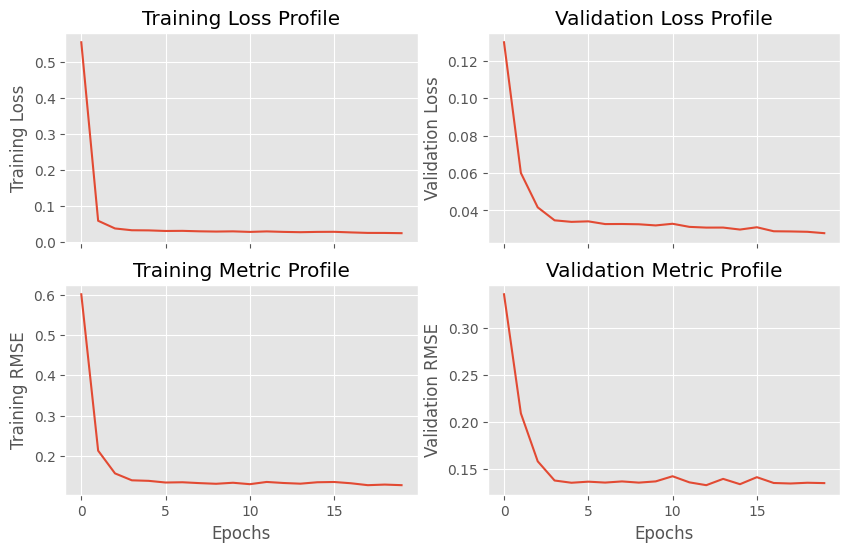

In [ ]:
# Plotting the Loss and Metric curves for best model trained
fig, ax = plt.subplots(2, 2, figsize = (10,6), sharex = True, sharey = False)
ax = ax.flat

train_loss = history.history["loss"]; train_metric = history.history["RMSE"]
valid_loss = history.history["val_loss"]; valid_metric = history.history["val_RMSE"]

x = range(len(train_loss))
ax[0].plot(x, train_loss); ax[0].set_ylabel("Training Loss"); ax[0].set_title("Training Loss Profile")
ax[1].plot(x, valid_loss); ax[1].set_ylabel("Validation Loss"); ax[1].set_title("Validation Loss Profile")

ax[2].plot(x, train_metric); ax[2].set_xlabel("Epochs"); ax[2].set_ylabel("Training RMSE"); ax[2].set_title("Training Metric Profile")
ax[3].plot(x, valid_metric); ax[3].set_xlabel("Epochs"); ax[3].set_ylabel("Validation RMSE"); ax[3].set_title("Validation Metric Profile");

In [ ]:
# Compute the regression metrics for the validation set
percent_error = np.abs(predictions - y_test) 
mae = percent_error.mean(axis = 0)
mse = ((predictions - y_test) ** 2).mean(axis = 0)
rmse = mse ** 0.5

In [ ]:
# Display the metrics in a dataframe
df = pd.DataFrame(np.vstack([mse, rmse, mae]))
df.index = ["MSE", "RMSE", "MAE"]
df.columns = target_variables
df

,math score,reading score,writing score
MSE,0.021477,0.018918,0.018592
RMSE,0.146550,0.137543,0.136351
MAE,0.116321,0.108885,0.103714


<div class="alert alert-primary"  style="padding: 10px; background-color: #a5eaf2; color: gray;">
Since this problem is a regression problem, we are not computing metrics like accuracy, recall etc. We are only computing the Regression specific metrics and it seems like our models are off by 10-15 marks on an average in predicting the scores across the three different tests...<br>Notice how RMSE is higher than MAE, that is because RMSE penalizes higher divergence scores more than lower deltas; On an absolute scale, we're about 10% off in predicting scores...
</div>

# 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

<div class="alert alert-primary"  style="padding: 10px; background-color: #a5eaf2; color: gray;">
    <span><b>Business Solution</b>: In this project we created a model to predict the performance of a student on a test given some pre-known attributes about a subject/student. Using this model and the attributes, we could figure out which students are likely to perform poorly or well in a particular field such as math or reading etc. This information could be utilized in several ways</span>
    <ul>
        <li>We could form groups or pairs of students who are strong in one subject and weak in another to encourage peer learning</li>
        <li>For those students whose scores are predicted to be too poor in a particular subject, extra attention could be given to understand their concerns, challenges and make the course experience better for them</li>
        <li>We could understand the strength of individual candidates and provide special attention to help them pursue those fields more agressively as per their capacity and predilection.</li> 
    </ul>
    <b>Challenges Faced</b>
    <ul>
        <li>Exhaustive hyperparameter tuning is very difficult for neural networks. We just used a small subset of most influential hyperparams to our knowledge for getting the most optimal model</li>
        <li>The same goes for decision of model architecture. We also tried using a single hidden layers with a more neurons but it didn't supercede the performance of a deeper but less tall network</li>
        <li> We couldn't think of any feature engineering methods by combining several features or something like that. Also all the features are categorical in nature which naturally limits any mathematical transformations like square, log, groupwise average etc.</li>
    </ul>    
    <b>Future Scope</b>
    <ul>
        <li>Collect/Simulate more data examples as the number of records are pretty low.</li>
        <li>Instead of plain one-hot/label encoding techniques, we could use Embeddings to represent categorical features which could be conveniently learned as per the task at hand</li>
        <li>Doing more extensive hyperparameter tuning and training with some tricks like learning rate scheduling etc.</li>
    </ul>
    
</div>